In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data_c = test_data.copy()
train_data_c = train_data.copy()

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.shape

(418, 11)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data Visualisation for Age

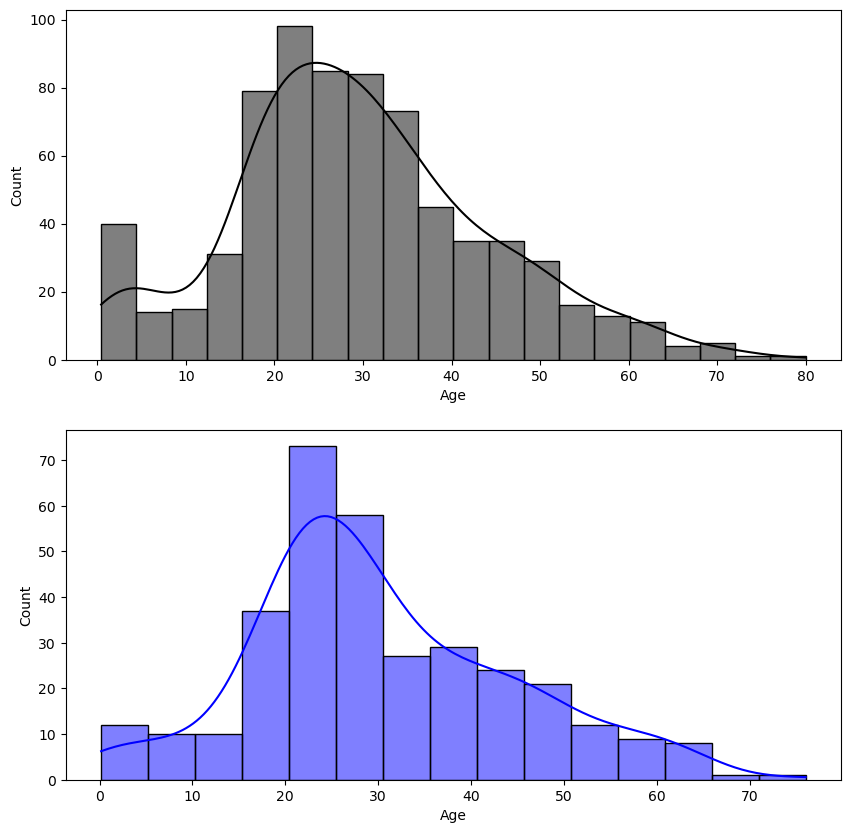

In [13]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0] = sns.histplot(train_data["Age"], kde = True, fill = True, color = "black", ax = ax[0]);
ax[1] = sns.histplot(test_data["Age"], kde = True, color = "blue", ax = ax[1]) 

In [14]:
print("Mean of train_data Age is : %s, Median of train_data Age is : %s " %(train_data["Age"].mean(),train_data["Age"].median()))

Mean of train_data Age is : 29.69911764705882, Median of train_data Age is : 28.0 


In [15]:
print("Mean of test_data Age is : %s, Median of test_data is : %s " %(test_data["Age"].mean(),test_data["Age"].median()))

Mean of test_data Age is : 30.272590361445783, Median of test_data is : 27.0 


In [16]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace = True)

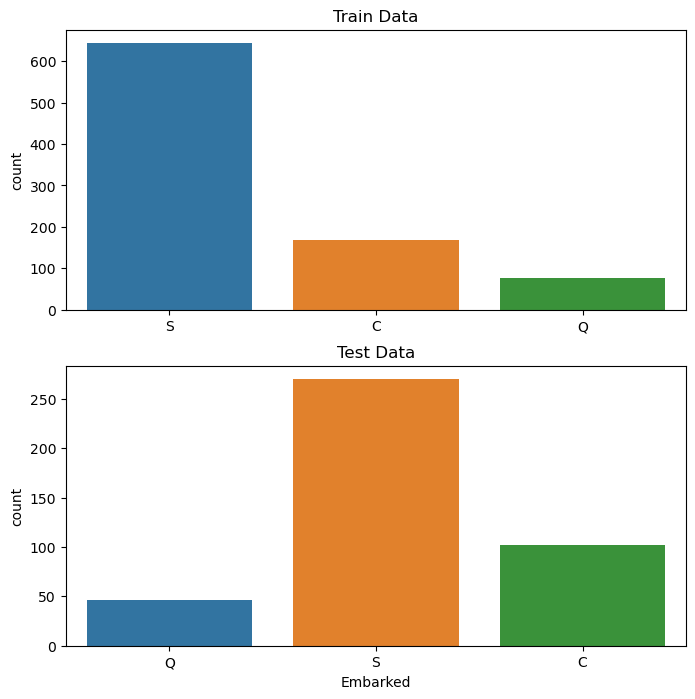

In [17]:
fig, ax = plt.subplots(2,1, figsize = (8,8))

ax[0] = sns.countplot(x = train_data["Embarked"], ax = ax[0]);
ax[0].set_title("Train Data");
ax[0].set_xlabel("")
ax[1] = sns.countplot(x = test_data["Embarked"], ax = ax[1]);
ax[1].set_title("Test Data");

In [18]:
train_data["Embarked"].fillna(train_data["Embarked"].mod, inplace = True)
test_data["Embarked"].fillna(test_data["Embarked"].mod, inplace = True)

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
train_cabin_null = (train_data["Cabin"].isnull().sum()/ len(train_data)*100)
test_cabin_null = (test_data["Cabin"].isnull().sum()/ len(test_data)*100)

In [20]:
print("The rate of missing values in train data's cabin row is %.2f%% " %train_cabin_null)

The rate of missing values in train data's cabin row is 77.10% 


In [21]:
print("The rate of missing values in test data's cabin row is %.2f%% " %test_cabin_null)

The rate of missing values in test data's cabin row is 78.23% 


In [22]:
test_data = test_data.drop("Cabin", axis = 1)
train_data = train_data.drop("Cabin", axis = 1)

In [23]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [24]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

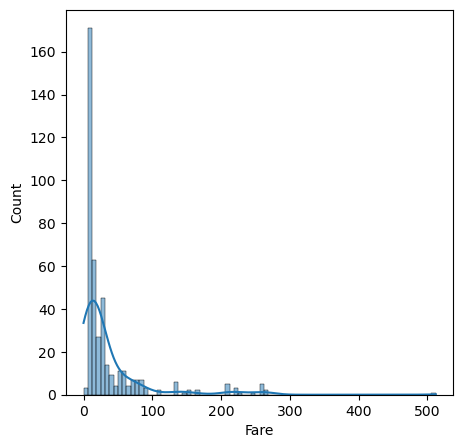

In [25]:
plt.figure(figsize = (5,5))
sns.histplot(test_data["Fare"], kde = True)

In [26]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)

## Exploratory Data Analysis (EDA)

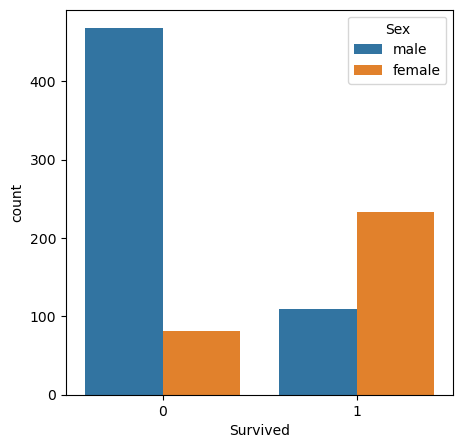

In [27]:
plt.figure(figsize = (5,5))
sns.countplot(x = train_data["Survived"], hue = train_data["Sex"])
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

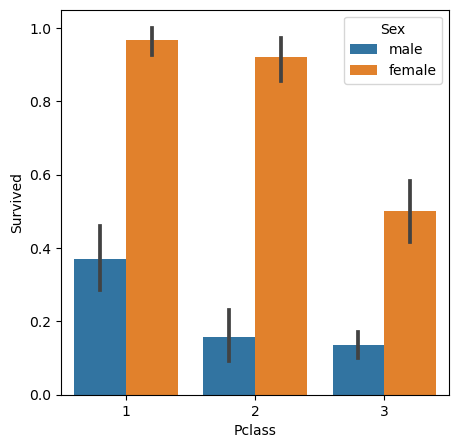

In [28]:
plt.figure(figsize = (5,5))
sns.barplot(x = train_data["Pclass"], y = train_data["Survived"], hue = train_data["Sex"])

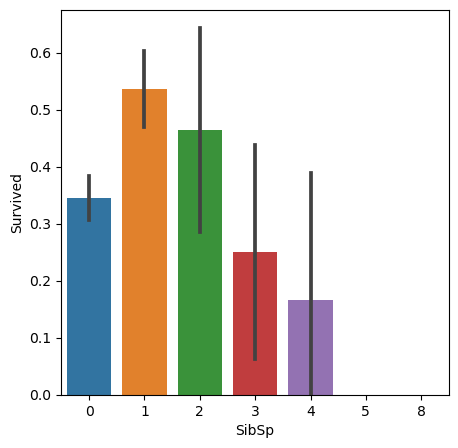

In [29]:
plt.figure(figsize = (5,5));
sns.barplot(x = "SibSp", y = "Survived", data = train_data);

### Create New Column from SibSp and Parch

In [30]:
train_data["Alone"]= np.zeros(len(train_data))

for i in range (len(train_data)):
    if (train_data["SibSp"][i] + train_data["Parch"][i] == 0):
        train_data["Alone"][i] = int(1)
        
test_data["Alone"]= np.zeros(len(test_data))

for i in range (len(test_data)):
    if (test_data["SibSp"][i] + test_data["Parch"][i] == 0):
        test_data["Alone"][i] = int(1)

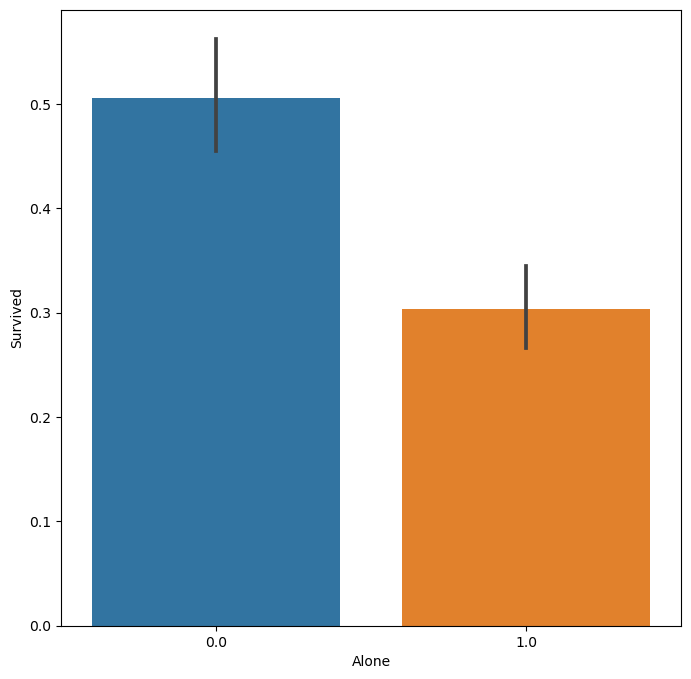

In [31]:
plt.figure(figsize = (8,8))
sns.barplot(x = "Alone", y = "Survived", data = train_data);

## Dropping Unnecessary Columns

In [32]:
drop_col = ["PassengerId", "Name","Ticket"]

train_data.drop(drop_col, axis = 1, inplace = True)
test_data.drop(drop_col, axis = 1, inplace = True)

In [33]:
print ( "Test Data Shape :%s, Train Data Shape:%s " %(test_data.shape, train_data.shape))

Test Data Shape :(418, 8), Train Data Shape:(891, 9) 


### One-Hot Encoding

In [34]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,0,3,male,22.0,1,0,7.2500,S,0.0
1,1,1,female,38.0,1,0,71.2833,C,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,0.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


In [35]:
train_data_encoded = pd.get_dummies(train_data, columns = ["Sex"])
train_data_encoded = pd.get_dummies(train_data_encoded, columns = ["Embarked"])

In [36]:
train_data_encoded.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone',
       'Sex_female', 'Sex_male',
       'Embarked_<bound method flex_method_SERIES.<locals>.flex_wrapper of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [37]:
train_data_encoded.drop( 'Embarked_<bound method flex_method_SERIES.<locals>.flex_wrapper of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>', axis = 1, inplace = True)

In [38]:
for i in range (len(train_data_encoded)):
                if (train_data_encoded["Embarked_S"][i] + train_data_encoded["Embarked_Q"][i] +train_data_encoded["Embarked_C"][i] == 0):
                    train_data_encoded["Embarked_S"][i] = 1
                
                

In [39]:
train_data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0.0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1.0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1.0,0,1,0,0,1


In [40]:
test_data_encoded = pd.get_dummies(test_data, columns = ["Sex"])
test_data_encoded = pd.get_dummies(test_data_encoded, columns = ["Embarked"])

In [41]:
test_data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0.0,1,0,0,0,1
2,2,62.0,0,0,9.6875,1.0,0,1,0,1,0
3,3,27.0,0,0,8.6625,1.0,0,1,0,0,1
4,3,22.0,1,1,12.2875,0.0,1,0,0,0,1


## Drop Unnecessary Columns

In [42]:
drop_cols = ["Sex_female", "Embarked_C"]

train_data_encoded.drop(drop_cols, axis = 1, inplace = True)
test_data_encoded.drop(drop_cols, axis = 1, inplace = True)

In [43]:
train_data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1,0,1
1,1,1,38.0,1,0,71.2833,0.0,0,0,0
2,1,3,26.0,0,0,7.9250,1.0,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,0,0,1
4,0,3,35.0,0,0,8.0500,1.0,1,0,1


In [44]:
test_data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1,1,0
1,3,47.0,1,0,7.0000,0.0,0,0,1
2,2,62.0,0,0,9.6875,1.0,1,1,0
3,3,27.0,0,0,8.6625,1.0,1,0,1
4,3,22.0,1,1,12.2875,0.0,0,0,1


## Split Data For Model

In [45]:
X_train = train_data_encoded.drop("Survived", axis = 1)
y_train = train_data_encoded["Survived"]

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5 )
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(test_data_encoded)


In [47]:
test_data_c["Survived"] = predictions
test_data_final = test_data_c[["PassengerId", "Survived"]]

test_data_final.set_index("PassengerId")

test_data_final.to_csv('submission.csv', index=False)